# Tutorial 10: Indexing, slicing and masking

## PHYS 2600

In [1]:
## Commonly-used import cell

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## T10.1 - Indexing, slicing, and masking

Let's begin with some simple practice in indexing.  First, __run the cell below__ to load a few arrays into the global namespace.  (If you make any mistakes below, you can always re-run this cell to re-initialize the arrays.)

In [2]:
planets = np.array(['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'n/a'])
powers_of_two = np.array([1,   2,   4,   8,  16,  32,  64, 128, 256, 512])
some_data = np.array([ 4.00, 1.72, -0.22, 1.80, -3.61, -0.90, -3.29, 4.45, 3.29, 2.26])
also_planets = planets

### Part A

Use _index_ notation `a[i]` to accomplish the following:

* Get and print the name of the sixth planet, Saturn, from `planets`.
* Set the last entry of `planets` to `'Pluto'` (then print `planets` again to make sure it worked.)

In [3]:
print(planets[5])
planets[-1] = 'Pluto'
print(planets)

Saturn
['Mercury' 'Venus' 'Earth' 'Mars' 'Jupiter' 'Saturn' 'Uranus' 'Neptune'
 'Pluto']


When you assigned to `planets` above, you changed the array __in-place__, which means you actually modified the block of memory allocated when we made `planets`.  That means that any name which points to the _same array_ will see the changes you made.

__Print out the array `also_planets`__ and verify that it shows the addition of Pluto as well.

In [4]:
also_planets

array(['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus',
       'Neptune', 'Pluto'], dtype='<U7')

### Part B

Use _slice_ notation `a[i:j:k]` to accomplish the following:

* Get and print the names of the _inner planets_, i.e. everything closer to the Sun than Jupiter, from `planets`.
* Get and print all _even_ powers of 2, i.e. $2^0, 2^2, 2^4...$, which appear in `powers_of_two`.


In [5]:
print(planets[:4])
print(powers_of_two[::2])

['Mercury' 'Venus' 'Earth' 'Mars']
[  1   4  16  64 256]


Now a more complicated use of slice notation: __divide the last three entries__ in `some_data` __by 5__ (change them __in-place__, i.e. this should _mutate_ `some_data`!)  The test following will verify that you've done this correctly.

(If the `some_data` array gets messed up and you need to reset it, just go back and re-run the first cell in this problem.)

In [6]:
some_data[-3:] /= 5
print(some_data)

[ 4.     1.72  -0.22   1.8   -3.61  -0.9   -3.29   0.89   0.658  0.452]


In [7]:
import numpy.testing as npt

npt.assert_allclose(some_data, [4, 1.72, -0.22, 1.8, -3.61, -0.9, -3.29, 0.89, 0.658, 0.452], rtol=1e-2)

### Part C

Finally, use _mask_ notation `a[bool_array]` to accomplish the following:

* Get and print all of the negative entries in `some_data`.
* Square all of the entries in `powers_of_two` which are greater than 100 (then print `powers_of_two`.)

In [8]:
print(some_data[some_data < 0])
powers_of_two[powers_of_two > 100] **= 2
print(powers_of_two)

[-0.22 -3.61 -0.9  -3.29]
[     1      2      4      8     16     32     64  16384  65536 262144]


## T10.2 - Changing arrays

In the above examples, we made modifications to our arrays _in place_.  Now let's investigate some of the NumPy operations that create _new_ arrays as a result.  As always, use the NumPy documentation and/or the `?` magic command if you're not sure exactly how to use a function.

### Part A

The array `a` below contains a list of even numbers from 0 to 16.  __Use `np.insert()`__ to make a new array with the number 9 added to it (in numerical order.)  Then, print your new array to make sure it worked.

In [9]:
a = np.arange(0,17,2)

### BEGIN SOLUTION
b = np.insert(a, 5, 9)
print(b)
### END SOLUTION

[ 0  2  4  6  8  9 10 12 14 16]


### Part B

__Use `np.delete()`__ to remove Pluto from the array `planets`, defined above.  Then print `planets` again to verify that you have removed it.

(Remember: `np.delete()` returns a new array, just like the other functions in this problem!  You'll have to save the result _back_ to `planets` if you want to change the original.) 

In [10]:
planets = np.delete(planets, -1)
print(planets)

['Mercury' 'Venus' 'Earth' 'Mars' 'Jupiter' 'Saturn' 'Uranus' 'Neptune']


### Part C

__Use `np.append()`__ to create a single array  that _counts from 0-60_ exactly as follows:

* Every number from 0 to 10 (including 0), then
* Every _other_ number from 10 to 30 (so `[10,12,14...]`), and finally
* Every _third_ number from 30 to 60, including 60 (so `[30,33,36...,60]`).

As a quick way to check your answer, your final array should have length 31.

In [11]:
### BEGIN SOLUTION
count_a = np.arange(0,10)
count_b = np.arange(10,30,2)
count_c = np.arange(30,61,3) # Adjust top end to include 60!

count = np.append(count_a, count_b)
count = np.append(count, count_c)
print(len(count))
count
### END SOLUTION

31


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 14, 16, 18, 20, 22,
       24, 26, 28, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60])

## T10.3 - More on masks and Boolean logic

Masks are one of the most powerful tools we have for manipulating parts of a NumPy array, beyond the simple examples we saw above.  Let's get more comfortable with using masks, and then see a couple of applications.

### Part A

Let's begin with the example from lecture:

<img src="https://raw.githubusercontent.com/wlough/CU-Phys2600-Fall2025/main/lectures/img/mask.png" width=400px />

In [12]:
a = np.array([17,-3,-44,8,56])
pos_mask = a > 0
print(pos_mask)
print(a[pos_mask])

[ True False False  True  True]
[17  8 56]


As we saw in lecture, we can use the mask __in reverse__, to assign to a sub-array of `a`.  In the cell below, __use `pos_mask` to multiply all of the positive entries in `a` by -1__, so that the array becomes entirely negative.

In [13]:
a[pos_mask] *= -1
print(a)

[-17  -3 -44  -8 -56]


When we use a comparison operator like `a > 0`, we _create a new array_ to be a mask.  That means that `pos_mask` doesn't change automatically if we change `a` - __run the cell below__ to verify that `pos_mask` is unchanged.  (Of course, we can always run a new comparison `a > 0` to get an updated mask.)

In [14]:
print(a)
print(pos_mask)
print(a > 0)

[-17  -3 -44  -8 -56]
[ True False False  True  True]
[False False False False False]


### Part B

As with single Boolean values, there are many situations where applying logical operations to combine or negate a mask is very useful.  Let's run through some examples: first __run the next cell__ to create an array and some masks.

In [15]:
b = np.arange(21)
div_2_mask = b % 2 == 0
div_3_mask = b % 3 == 0
div_5_mask = b % 5 == 0
print(b)
print(b[div_2_mask])
print(b[div_3_mask])
print(b[div_5_mask])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 0  2  4  6  8 10 12 14 16 18 20]
[ 0  3  6  9 12 15 18]
[ 0  5 10 15 20]


Our masks here are using the modulo operator to single out numbers in `b` that are divisible by 2, 3, or 5.  Thus, for example, `b[div_2_mask]` gives us all the even numbers.  

But what if we want all the _odd_ numbers in `b` instead?  We could make a new mask like `b % 2 != 0`, but we don't need to, since `div_2_mask` already has the information we want if we apply the logical operation `not` to it.

Unfortunately, we can't use the keyword `not`, as you'll see from running the cell below:

In [16]:
not div_2_mask

This is the error you'll see if you try to use any of `and`, `or`, or `not` on an array: these operators only work on single Boolean values, not arrays!  Instead, we must use the NumPy equivalent functions.  __Run the next cell__ to see simple examples of each NumPy logical operation.

In [17]:
bool_A = np.array([True, True, False])
bool_B = np.array([False, True, True])

print(np.logical_not(bool_A))
print(np.logical_or(bool_A, bool_B))
print(np.logical_and(bool_A, bool_B))

# Shorthand with "bit logic" operators
print(~bool_A)
print(bool_A | bool_B)
print(bool_A & bool_B)

[False False  True]
[ True  True  True]
[False  True False]
[False False  True]
[ True  True  True]
[False  True False]


The operators `~`, `|` and `&` are __"bit logic" operations__, that act on the underlying binary data of a Python object directly.  For most purposes you should avoid these operators, but since a Boolean object is a single bit, they just act like shorthand for the logical operations `not`, `or`, `and`.  

You can use them interchangeably, but __be careful with the bit-wise operators__, because they will work on _non-Boolean_ objects too - and the results will be pretty weird!

Back to our example: use the `not` operation and `div_2_mask` to __select all of the odd entries in `b`__.

In [18]:
b[np.logical_not(div_2_mask)]

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

Now use the `and` operation with the masks we defined to __select all of the multiples of 6 in `b`__.

In [19]:
b[np.logical_and(div_2_mask, div_3_mask)]

array([ 0,  6, 12, 18])

Finally, let's try assigning through the mask: use the `or` operation to __set every entry of `b` which is not a multiple of 2, 3, or 5 to zero.__  (Print `b` again to verify your operation.)

In [20]:
div_235_mask = np.logical_not(np.logical_or(div_2_mask, np.logical_or(div_3_mask, div_5_mask)))
b[div_235_mask] = 0

print(b)

[ 0  0  2  3  4  5  6  0  8  9 10  0 12  0 14 15 16  0 18  0 20]


### Part C

One more bit of weirdness related to NumPy masks before we finish.  We learned before that for convenience, Python will let us chain inequalities together.  This is most useful for testing if a number is inside of a particular interval:

In [21]:
x = 0.5
y = 1.2

print(0 < x < 1, 0 < y < 1)

True False


If you think about it, any double-inequality test like this is equivalent to doing the two tests on either side alone, and then joining them with an `and`.  In fact, __that is exactly what Python does__.  Unfortunately, this means that when we try to use this notation with NumPy, we get an error!

__Run the cell below__ to see the familiar message about ambiguous truth values from above.  

In [22]:
z = np.array([0.5, 1.2])
print(0 < z < 1)  ## Interpreted as "(0 < z) and (z < 1)"

Now using your new understanding of logic operations in NumPy, __fix the code__: rewrite the test in the cell below so it will give the array `0 < z < 1 = [True, False]` without an error.

In [23]:
print(np.logical_and(0<z, z<1))
print((0<z) & (z<1))  ## Note the parentheses - & has a different order of operations than "and"!

[ True False]
[ True False]


### Part D (optional challenge)

Now let's actually do something useful with masks! Implement the __square wave pulse__ function `square_wave(x)` below, which is defined by

$$
w(x) = \begin{cases} 1, -1 \leq x \leq 1; \\ 0,\ \rm{otherwise}. \end{cases}
$$

_(Hint: the_ `np.zeros_like()` or `np.ones_like()` _functions would be a useful starting point for making the array `w` that your function should return.  Then you just need to apply a mask to set some of the zeros to 1 (or vice-versa.)_

__Important note:__ make sure you make a _new_ array for the result of the function `w(x)`, and don't overwrite anything in `x` itself!  Changing `x` would be an example of a __side effect__, which is when a function does something _other_ than just returning a new object.  If you're trying to plot `w(x)`, you don't want to change the `x` array that you're given!

In [24]:
def square_wave(x):
    ### BEGIN SOLUTION

    ## Remember that -1 <= x <=1 will fail!
    ## We need the numpy version:
    wave_mask = np.logical_and(-1 <= x, x <= 1)
    
    w = np.zeros_like(x, np.float64)
    w[wave_mask] = 1.
    
    ## We don't need to do this, because those entries are already zero!
#    w[~wave_mask] = 0.  
    
    return w
    ### END SOLUTION
    

In [25]:
import numpy.testing as npt

x = np.arange(-5,5)
npt.assert_allclose(square_wave(x), [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.])
npt.assert_allclose(x, np.arange(-5,5))  # Make sure x didn't change - no side effects!

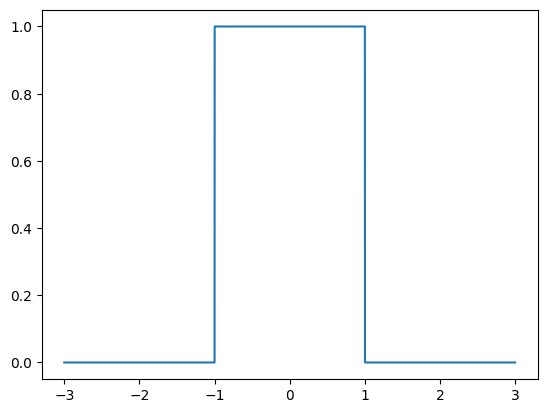

In [26]:
# Test plot: should look like a square pulse from -1 to 1

x = np.linspace(-3,3,100000)
w = square_wave(x)
plt.plot(x,w)